<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/2ndOrderSystem_ParallelRLC_natural_anim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>2nd-Order System RLC in Parallel</h1></b>

Dr. Bingsen Wang

3/22/2025
</center>

0
0
100
200
300
400
500
600
700
800
900
0


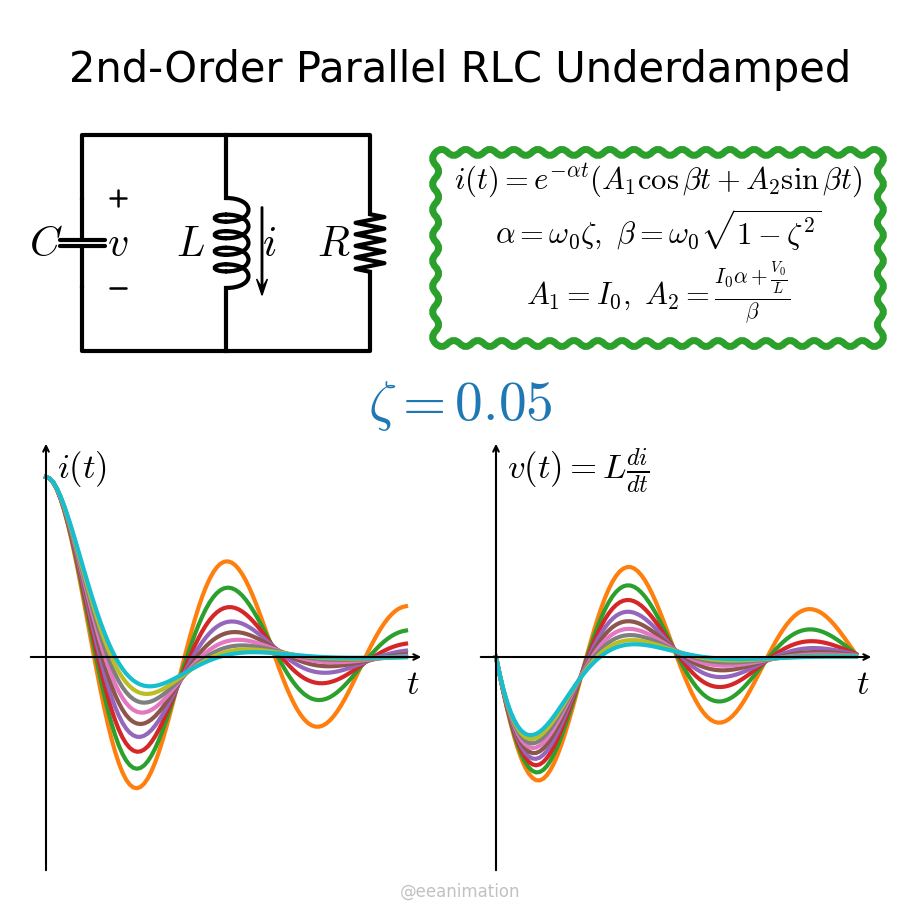

In [40]:
from matplotlib import pyplot,patches,cm,transforms,path,animation
import numpy as np
pyplot.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})

#draw resistor symbol
def draw_resistor(ax,x0,y0,n,w,h,theta=0,lw=1,c='k',alpha=1):
    verts = [(x0,y0)]+[(x0+(.5*k+.25)*w/n,y0+(-1)**k*h) for k in range(2*n)]+[(x0+w,y0)]
    codes = [path.Path.MOVETO]+[path.Path.LINETO]*(2*n+1)
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=c,alpha=alpha,fc='None',lw=lw,capstyle='round',joinstyle='round',transform=rot))
    return
#draw capacitor symbol
def draw_capacitor(ax,x0,y0,h,theta=0,lw=1,c='k',alpha=1):
    dx,dy = (.075*h, .25*h)
    verts = [(x0,y0),(x0+h/2-dx/2,y0),(x0+h/2-dx/2,y0+dy),(x0+h/2-dx/2,y0-dy),
             (x0+h,y0),(x0+h/2+dx/2,y0),(x0+h/2+dx/2,y0+dy),(x0+h/2+dx/2,y0-dy)]
    codes = [path.Path.MOVETO,path.Path.LINETO]*4
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=c,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    return
#draw inductor symbol
def draw_inductor(ax,x0,y0,n,w,h,theta=0,lw=1,c='k',alpha=1):
    w= w/(0.7*n+0.3)#width of larger coil
    verts,codes = [],[]
    for k in range(n): #larger coil half
        verts += [(x0+.7*k*w,y0),(x0+.7*k*w,y0+h),(x0+(.7*k+1)*w,y0+h),(x0+(.7*k+1)*w,y0)]
        codes += [path.Path.MOVETO]+[path.Path.CURVE4]*3
    for k in range(1,n): #smaller coil half
        verts += [(x0+.7*k*w,y0),(x0+.7*k*w,y0-h/2),(x0+(.7*k+.3)*w,y0-h/2),(x0+(.7*k+.3)*w,y0)]
        codes += [path.Path.MOVETO]+[path.Path.CURVE4]*3
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=c,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    return

xy=[-1.05,.6]
xy1=[(-1.15,-.55),(.1,-.55)]
x1=.55
h,w=.6,.8
wr,wc=.16,.25
t=np.linspace(0,10,100)
zeta=np.linspace(.05,.5,10)
omega0 = 2*2*np.pi/max(t)
alpha=omega0*zeta; beta=omega0*np.sqrt(1-zeta**2)
V0=1; I0=0
A1=V0
C=1;L=1/(omega0**2*C); A2 = (V0*alpha-I0/C)/beta
iLt=[np.exp(-alpha[k]*t)*(A1*np.cos(beta[k]*t)+A2[k]*np.sin(beta[k]*t)) for k in range(len(zeta))]
vt=[-alpha[k]*L*np.exp(-alpha[k]*t)*(A1*np.cos(beta[k]*t)+A2[k]*np.sin(beta[k]*t))+
    L*np.exp(-alpha[k]*t)*(-beta[k]*A1*np.sin(beta[k]*t)+beta[k]*A2[k]*np.cos(beta[k]*t)) for k in range(len(zeta))]
cl = list(cm.tab10.colors) #color list
fig = pyplot.figure(figsize=([9,9]))
ax= fig.add_axes([0,0,1,1],xlim=[-1.25,1.25],ylim=[-1.25,1.25]); ax.axis('off')
ax.text(0,1.05,'2nd-Order Parallel RLC Underdamped',size=30,ha='center')
draw_capacitor(ax,xy[0],xy[1]-wc/2,wc,theta=90,lw=3)
draw_inductor(ax,xy[0]+w/2,xy[1]+wc/2,5,wc,wc/3,theta=-90,lw=3)
draw_resistor(ax,xy[0]+w,xy[1]-wr/2,5,wr,wr/4,theta=90,lw=3,)
[ax.plot(xy[0]+np.array([0,0,w,w]),xy[1]-(-1)**k*np.array([wc,h,h,wr])/2,[xy[0]+w/2]*2,xy[1]+(-1)**k*np.array([h/2,wc/2]),c='k',lw=3) for k in range(2)]
[ax.scatter(xy[0]+.1,xy[1]+wc/2*(-1)**k,s=150,marker=['$+$','$-$'][k],c='k') for k in range(2)]
ax.add_patch(patches.FancyArrow(xy[0]+w/2+.1,xy[1]+.1,0,-.2,width=.004,head_width=.03,overhang=.5,fc='k'))
[ax.text(xy[0]+[.1,-.1,w/2+.12,w/2-.1,w-.1][k],xy[1],['$v$','$C$','$i$','$L$','$R$'][k],
         size=30,ha='center',va='center') for k in range(5)]
[ax.annotate('',(xy1[k][0]+1.05,xy1[k][1]),(xy1[k][0]-.05,xy1[k][1]),arrowprops={'arrowstyle':'->', 'color':'k', 'lw':1.5}) for k in range(2)]
[ax.annotate('',(xy1[k][0],xy1[k][1]+.6),(xy1[k][0],xy1[k][1]-.6),arrowprops={'arrowstyle':'->', 'color':'k', 'lw':1.5}) for k in range(2)]
[ax.text(xy1[i][0]+[1,.03][k],xy1[i][1]+[-.1,.5][k],['$t$',['$i(t)$',r'$v(t)=L\frac{di}{dt}$'][i]][k],size=25) for k in range(2) for i in range(2)]
ax.text(x1,xy[1],r'$i(t)=e^{-\alpha t}(A_1\cos\beta t+A_2\sin\beta t)$'+'\n'+
        r'$\alpha=\omega_0\zeta,\ \beta=\omega_0\sqrt{1-\zeta^2}$'+'\n'+
        r'$A_1=I_0,\ A_2=\frac{I_0\alpha + \frac{V_0}{L}}{\beta}$',
        size=22,ha='center',va='center',multialignment='center',
        bbox=dict(boxstyle='roundtooth',pad=.8,facecolor='w',edgecolor=cl[2],lw=5))
txt_zeta=ax.text(0,xy1[0][1]+.7,'',size=40,ha='center',va='center')
lines = [[ax.plot([],[],lw=3,c=cl[k])[0] for k in range(len(zeta))] for i in range(2)]

def animate(ii):
  i=ii%len(t);k=ii//len(t)
  if i==0:
    print(ii)
    txt_zeta.set_text(rf'$\zeta={zeta[k]:.2f}$')
    txt_zeta.set_color(cl[k])
  [lines[kk][k].set_data(xy1[kk][0]+t[:i+1]/max(t),xy1[kk][1]+[iLt[k],vt[k]][kk][:i+1]/2) for kk in range(2)]
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=len(zeta)*len(t), interval=50)
anim.save("ParallelRLCnatural.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)